In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
os.chdir(r'C:\Users\Pratik G Ratnaparkhi\Desktop\IVY Python')
path_data = os.getcwd()
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#Renaming The Columns name
data.rename(columns={"Genre":"Gender"
                     ,"Annual Income (k$)":"Annual_Income",
                     "Spending Score (1-100)":"Spending_Score"},inplace=True)
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#Avg Score spends by Gender
Avg_score = data[['Gender','Spending_Score']].groupby(['Gender'],as_index=False).mean()
Avg_score

,Gender,Spending_Score
0,Female,51.526786
1,Male,48.511364


In [7]:
#Avg Age Of Male And Female
Avg_Age = data[['Gender','Age']].groupby(['Gender'],as_index=False).mean()
Avg_Age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


In [8]:
#we will do some basic Data Visualization

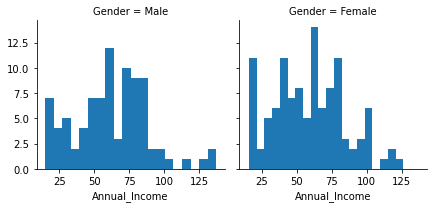

In [9]:
#Income wrt Genre
g = sns.FacetGrid(data,col='Gender')
g.map(plt.hist,'Annual_Income',bins=20)

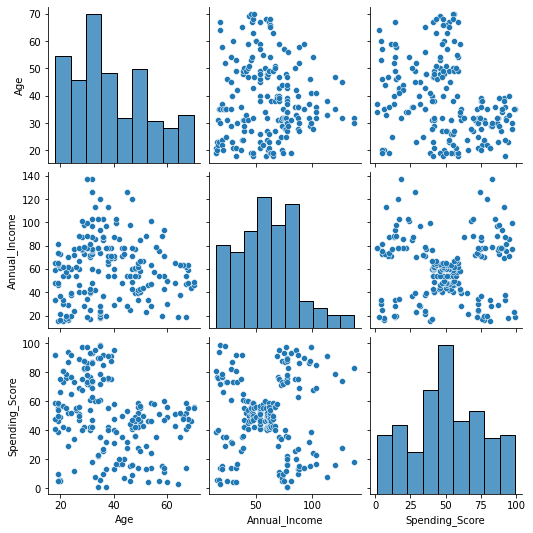

In [10]:
#Ploting pairplot
sns.pairplot(data[['Age','Annual_Income','Spending_Score']])

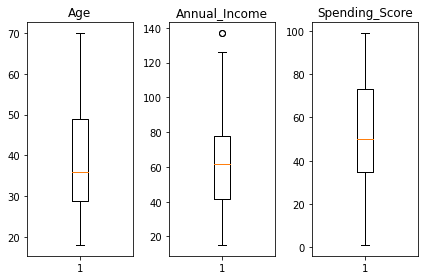

In [11]:
#Checking For Outliers using Box-Plot
plt.subplot(1,3,1)
plt.boxplot(data['Age'])
plt.title('Age')
plt.subplot(1,3,2)
plt.boxplot(data['Annual_Income'])
plt.title('Annual_Income')
plt.subplot(1,3,3)
plt.boxplot(data['Spending_Score'])
plt.title('Spending_Score')
plt.tight_layout()

In [12]:
#droping Gender feature
x = data.drop(['Gender','CustomerID'],axis=1)
y = data['Gender']

In [13]:
# As we are clustering on the basis of Age, Income and Score 
# We will drop gender column

In [14]:
print(x.head())

print(y.head())


   Age  Annual_Income  Spending_Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40
0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object


In [15]:
#Exploratory Data Analysis
print(x.describe(include="all"))

              Age  Annual_Income  Spending_Score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13.969007      26.264721       25.823522
min     18.000000      15.000000        1.000000
25%     28.750000      41.500000       34.750000
50%     36.000000      61.500000       50.000000
75%     49.000000      78.000000       73.000000
max     70.000000     137.000000       99.000000


In [16]:
#checking missing values
print(x.isna().sum())

Age               0
Annual_Income     0
Spending_Score    0
dtype: int64


In [17]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
x_scaled = scaler1.fit_transform(x)

In [18]:
x_scaled = pd.DataFrame(x_scaled)

In [19]:
kmeans=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
x_scaled1 = x_scaled._get_numeric_data().dropna(axis=1)
kmeans.fit(x_scaled1)
predict=kmeans.predict(x_scaled1)


In [20]:
kmeans.cluster_centers_

array([[-0.75277339,  0.00262858,  0.74265245],
       [ 0.70892251, -0.00247545, -0.69939115]])

In [21]:
kmeans.inertia_

389.38618895643714

In [22]:
inertias = []
mapping = {}

for k in range(1,10):
    kmeansmodel = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeansmodel.fit(x_scaled)
    inertias.append(kmeansmodel.inertia_)
    mapping[k] = kmeansmodel.inertia_

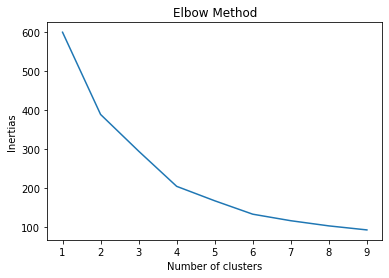

In [23]:
#ploting Elbow plot to know the number of clusters 
plt.plot(range(1, 10), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

In [56]:
#Checking Silhouette score
from sklearn.metrics import silhouette_score
range_k = [2,3,4,5,6,7]
for i in range_k:
    kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=i, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
    kmeans.fit(x_scaled)
    clabel = kmeans.labels_
    score = silhouette_score(x_scaled,clabel)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, score))

For n_clusters=2, the silhouette score is 0.44469909655806533
For n_clusters=3, the silhouette score is 0.44004203374566925
For n_clusters=4, the silhouette score is 0.4812592046464349
For n_clusters=5, the silhouette score is 0.4700106743569381
For n_clusters=6, the silhouette score is 0.4585278548882639
For n_clusters=7, the silhouette score is 0.4420896077242804


In [73]:
#From plot lets make a final model with k=4
x_scaled = pd.DataFrame(x_scaled)
kmeans=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
x_scaled1 = x_scaled._get_numeric_data().dropna(axis=1)
kmeans.fit(x_scaled1)
predict=kmeans.predict(x_scaled1)

In [74]:
x_scaled = pd.DataFrame(x_scaled)

In [75]:
x_scaled1 = x_scaled['clusters']=pd.Series(predict,index=x_scaled.index)
x_scaled1

0      3
1      3
2      3
3      3
4      3
      ..
195    1
196    0
197    1
198    0
199    1
Length: 200, dtype: int32

In [76]:
x['cluster_id'] = kmeans.labels_
x.head()

,Age,Annual_Income,Spending_Score,cluster_id
0,19,15,39,3
1,21,15,81,3
2,20,16,6,3
3,23,16,77,3
4,31,17,40,3


<AxesSubplot:xlabel='cluster_id', ylabel='Spending_Score'>

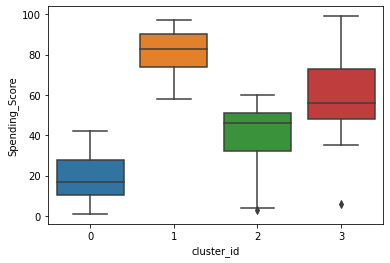

In [77]:
sns.boxplot(x='cluster_id', y='Spending_Score', data=x)